# Simple Linear Regression.

### Import the relevant libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [16]:
observations = 1000
xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
# (observations,1) produces a matrix shaped (1000,1)
zs = np.random.uniform(low = -10, high = 10, size = (observations,1))

print(xs.shape,zs.shape)

(1000, 1) (1000, 1)


In [17]:
# This is the X matrix from the linear model y = w*x + b.
inputs = np.column_stack((xs,zs)) #add in 2-D array the weights xs and zs
inputs.shape #(1000,2) 

(1000, 2)

### Generate the targets we will aim at

In [18]:
noise = np.random.uniform(-1,-1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise #the actual linear function
targets.shape #(1000,1)

(1000, 1)

### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

In [19]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.

targets = targets.reshape(observations)
targets.shape

(1000,)

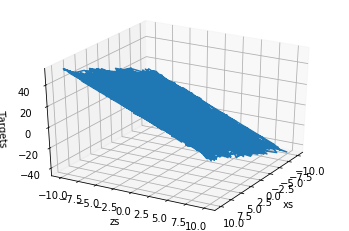

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')# A method allowing us to create the 3D plot

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

#The azim parameter plots the data from different angles.
ax.view_init(azim=30)
plt.show()


In [21]:
# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot.
targets = targets.reshape(observations,1)

### Initialize variables

In [22]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1)) #size 2,1 bcause 2 inputs (x,z) and 1 output (y)
#Generates the initial values x0 and z0 in a random manner between the 'init_range' range.
biases = np.random.uniform(-init_range,init_range,size=(1))

#weights.shape
print(weights)
print(biases)

[[-0.06211052]
 [ 0.05382273]]
[0.0033137]


### Set a learning rate

In [23]:
learning_rate = 0.02

### Train the model

In [24]:
#Gradient descent optimization algorithm
for i in range (280):
    
    outputs = np.dot(inputs,weights) + biases

    delta = outputs - targets
    
    loss = np.sum(delta ** 2)/ 2 /observations #We find the loss per observation
    
    print (loss)
 
    delta_scaled = delta / observations #As we scaled before, we do now

    weights = weights - learning_rate * np.dot(inputs.T,delta_scaled) #Inputs transpose to fit
     # 2x1   = 2x1     -                         (2x1000)(1000x1)
    biases = biases - learning_rate * np.sum(delta_scaled)


231.2855226943345
35.17052886258333
10.676640384535801
7.398251932998237
6.752438768754848
6.441722527541569
6.181595090715388
5.936494668869366
5.701672999742172
5.476209283028168
5.259669779394906
5.051693717017292
4.851941505129935
4.660087838009791
4.475820379300188
4.298839156106996
4.128856058586567
3.9655943694301334
3.808788313206887
3.6581826236822828
3.5135321282645684
3.3746013488853976
3.2411641186625393
3.11300321372042
2.989909999569094
2.8716840914659323
2.7581330282072085
2.6490719588184595
2.544323341633639
2.4437166552731595
2.3470881210503505
2.2542804363543847
2.1651425185757227
2.0795292591571215
1.9973012873698852
1.9183247434307873
1.8424710605903156
1.7696167558375036
1.699643228880636
1.632436569076575
1.5678873699944282
1.5058905513116638
1.4463451877527442
1.3891543447918024
1.3342249208519084
1.2814674957440233
1.2307961850989355
1.1821285005551856
1.135385215475399
1.0904902359723938
1.0473704770351537
1.005955743552952
0.9661786160440038
0.9279743409025716

We can see how numbers above keep moving towards zero (the minimum) 

In [25]:
#print(outputs.shape,targets.shape,weights.shape,deltas.shape,inputs.shape)

### Print weights and biases and see if we have worked correctly.

In [26]:
print(weights,biases) #weights should be 2 and -3. Biases should be 5. The more iterations the model, the greater the accuracy

[[ 2.00005492]
 [-3.00007913]] [3.98600698]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

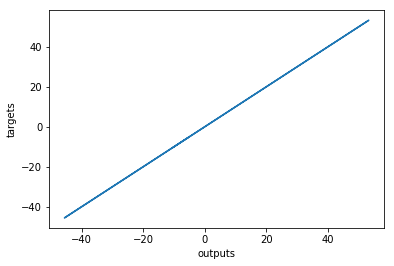

In [27]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()